# EDA I
## Li Ruixue
Exploration write-up

In this short paper, I'll explain my exploration of two research questions:
1. What do people think of the nation's spending on various problems?
2. How many children do people have?

### 1. What do people think of the nation's spending on various problems?

There are a series of 18 variables in the dataset starting with 'nat' that represent people opinions on whether the country is spending 'too little', 'about right', or 'too much' on solving a problem. The problems include space exploration program, improving and protecting the environment, improving and protecting the nation's health, and so on. 
I have summarized people's attitude on these spendings with a special focus on gender differences in opinions. 

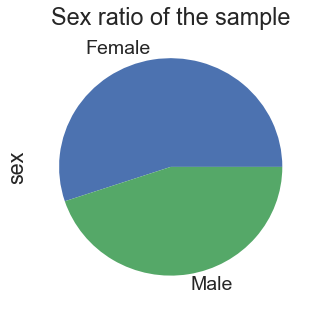

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
dataFile = 'https://github.com/UC-MACSS/persp-analysis/blob/master/assignments/exploratory-data-analysis/data/gss2012.csv?raw=True'
df = pd.read_csv(dataFile)
sns.set_context('talk', font_scale = 1.5)
plt.figure(figsize = (5,5))
df['sex'].value_counts().plot(kind = "pie")
plt.title('Sex ratio of the sample')
plt.show()

By observing the pie chart relevant subset of data, we can see that we have slightly more female than male in the sample, and quite a few missing values. I continued by taking a closer look at two of the variables.

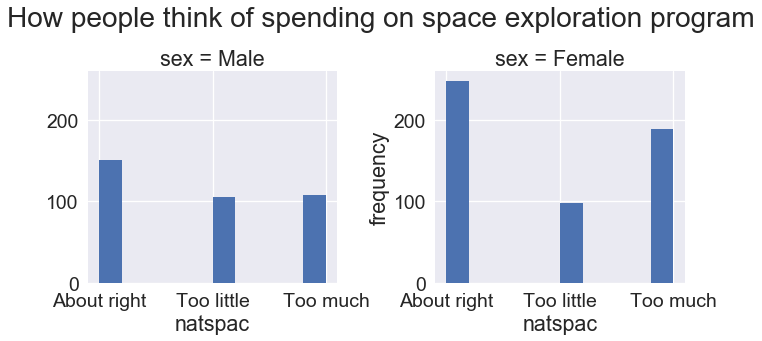

In [156]:
g = sns.FacetGrid(col = 'sex', data = df_nat,size = 5)
g = g.map(plt.hist, 'natspac')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How people think of spending on space exploration program')
plt.ylabel('frequency')
plt.show()

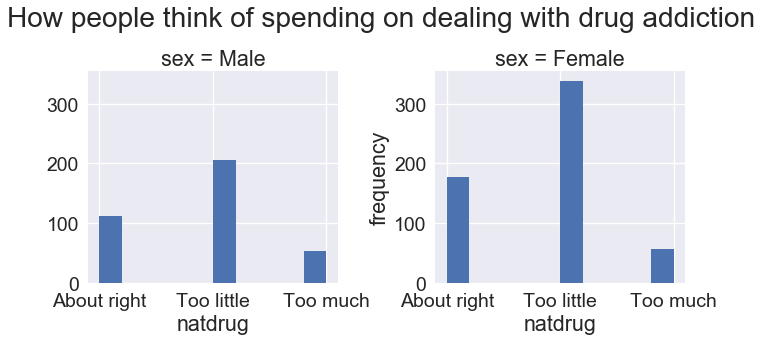

In [157]:
g = sns.FacetGrid(col = 'sex', data = df_nat,size = 5)
g = g.map(plt.hist, 'natdrug')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How people think of spending on dealing with drug addiction')
plt.ylabel('frequency')
plt.show()

It seems that females tend to have stronger opinions than male respondents, and I'd like to check whether this is true. But before proceeding with my analysis, I'd like to check whether there are many missing values because the discrepancy could be caused by missing values.

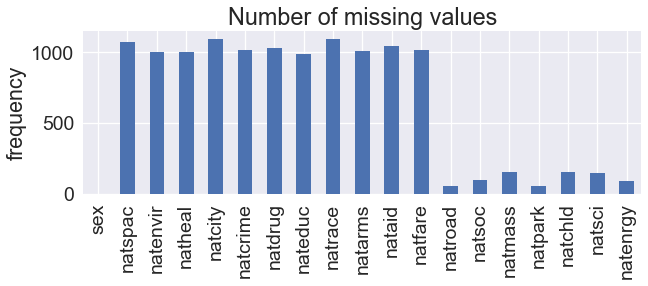

In [158]:
plt.figure(figsize = (10, 3))
df_nat.isnull().sum().plot(kind = 'bar')
plt.title('Number of missing values')
plt.ylabel('frequency')
plt.show()

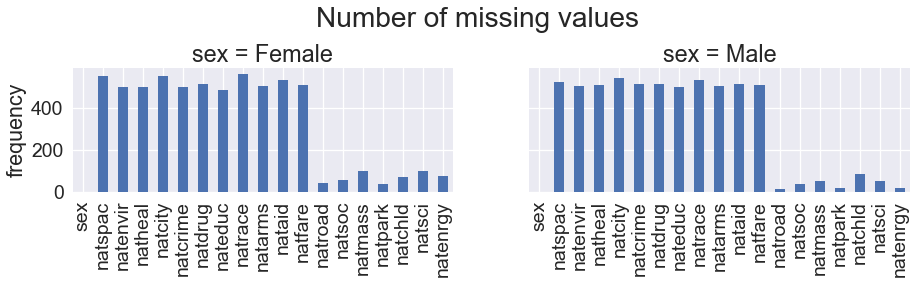

In [143]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 3), sharey = True)
df_nat.loc[df_nat['sex'] == 'Female'].isnull().sum().plot(kind = 'bar', ax = axes[0])
df_nat.loc[df_nat['sex'] == 'Male'].isnull().sum().plot(kind = 'bar', ax = axes[1])
plt.subplots_adjust(top=0.7)
fig.suptitle('Number of missing values')
axes[0].set_title('sex = Female')
axes[0].set_ylabel('frequency')
axes[1].set_title('sex = Male')
plt.show()

We can see that while there are no significant difference in the pattern of missing values among male and female respondents, there are a few variables, such as 'natspac' and 'natenvir', have many more missing values than some other variables such as 'natroad' and 'natsoc'. Since there are only around 2000 observations in the dataset and the number of missing values could be as many as close to 1000 for those variables, I would say that this dataset in this raw form isn't that ideal in studying the nation's opinion on spending on those issues and if further research is conducted on these data regarding this topic, the reason of the large number of missing values need to be further explored. 

I then proceeded to code the opinions with numbers in order to evaluate the average opinion: 

    Spending too much: 1
    Spending too little: -1
    About right: 0
    
By doing so, intuitively, an average positive number for a variable would represent people thinking that the spending is too much on average, and an average negative number would indicate that people in general think that the country's spending too little.

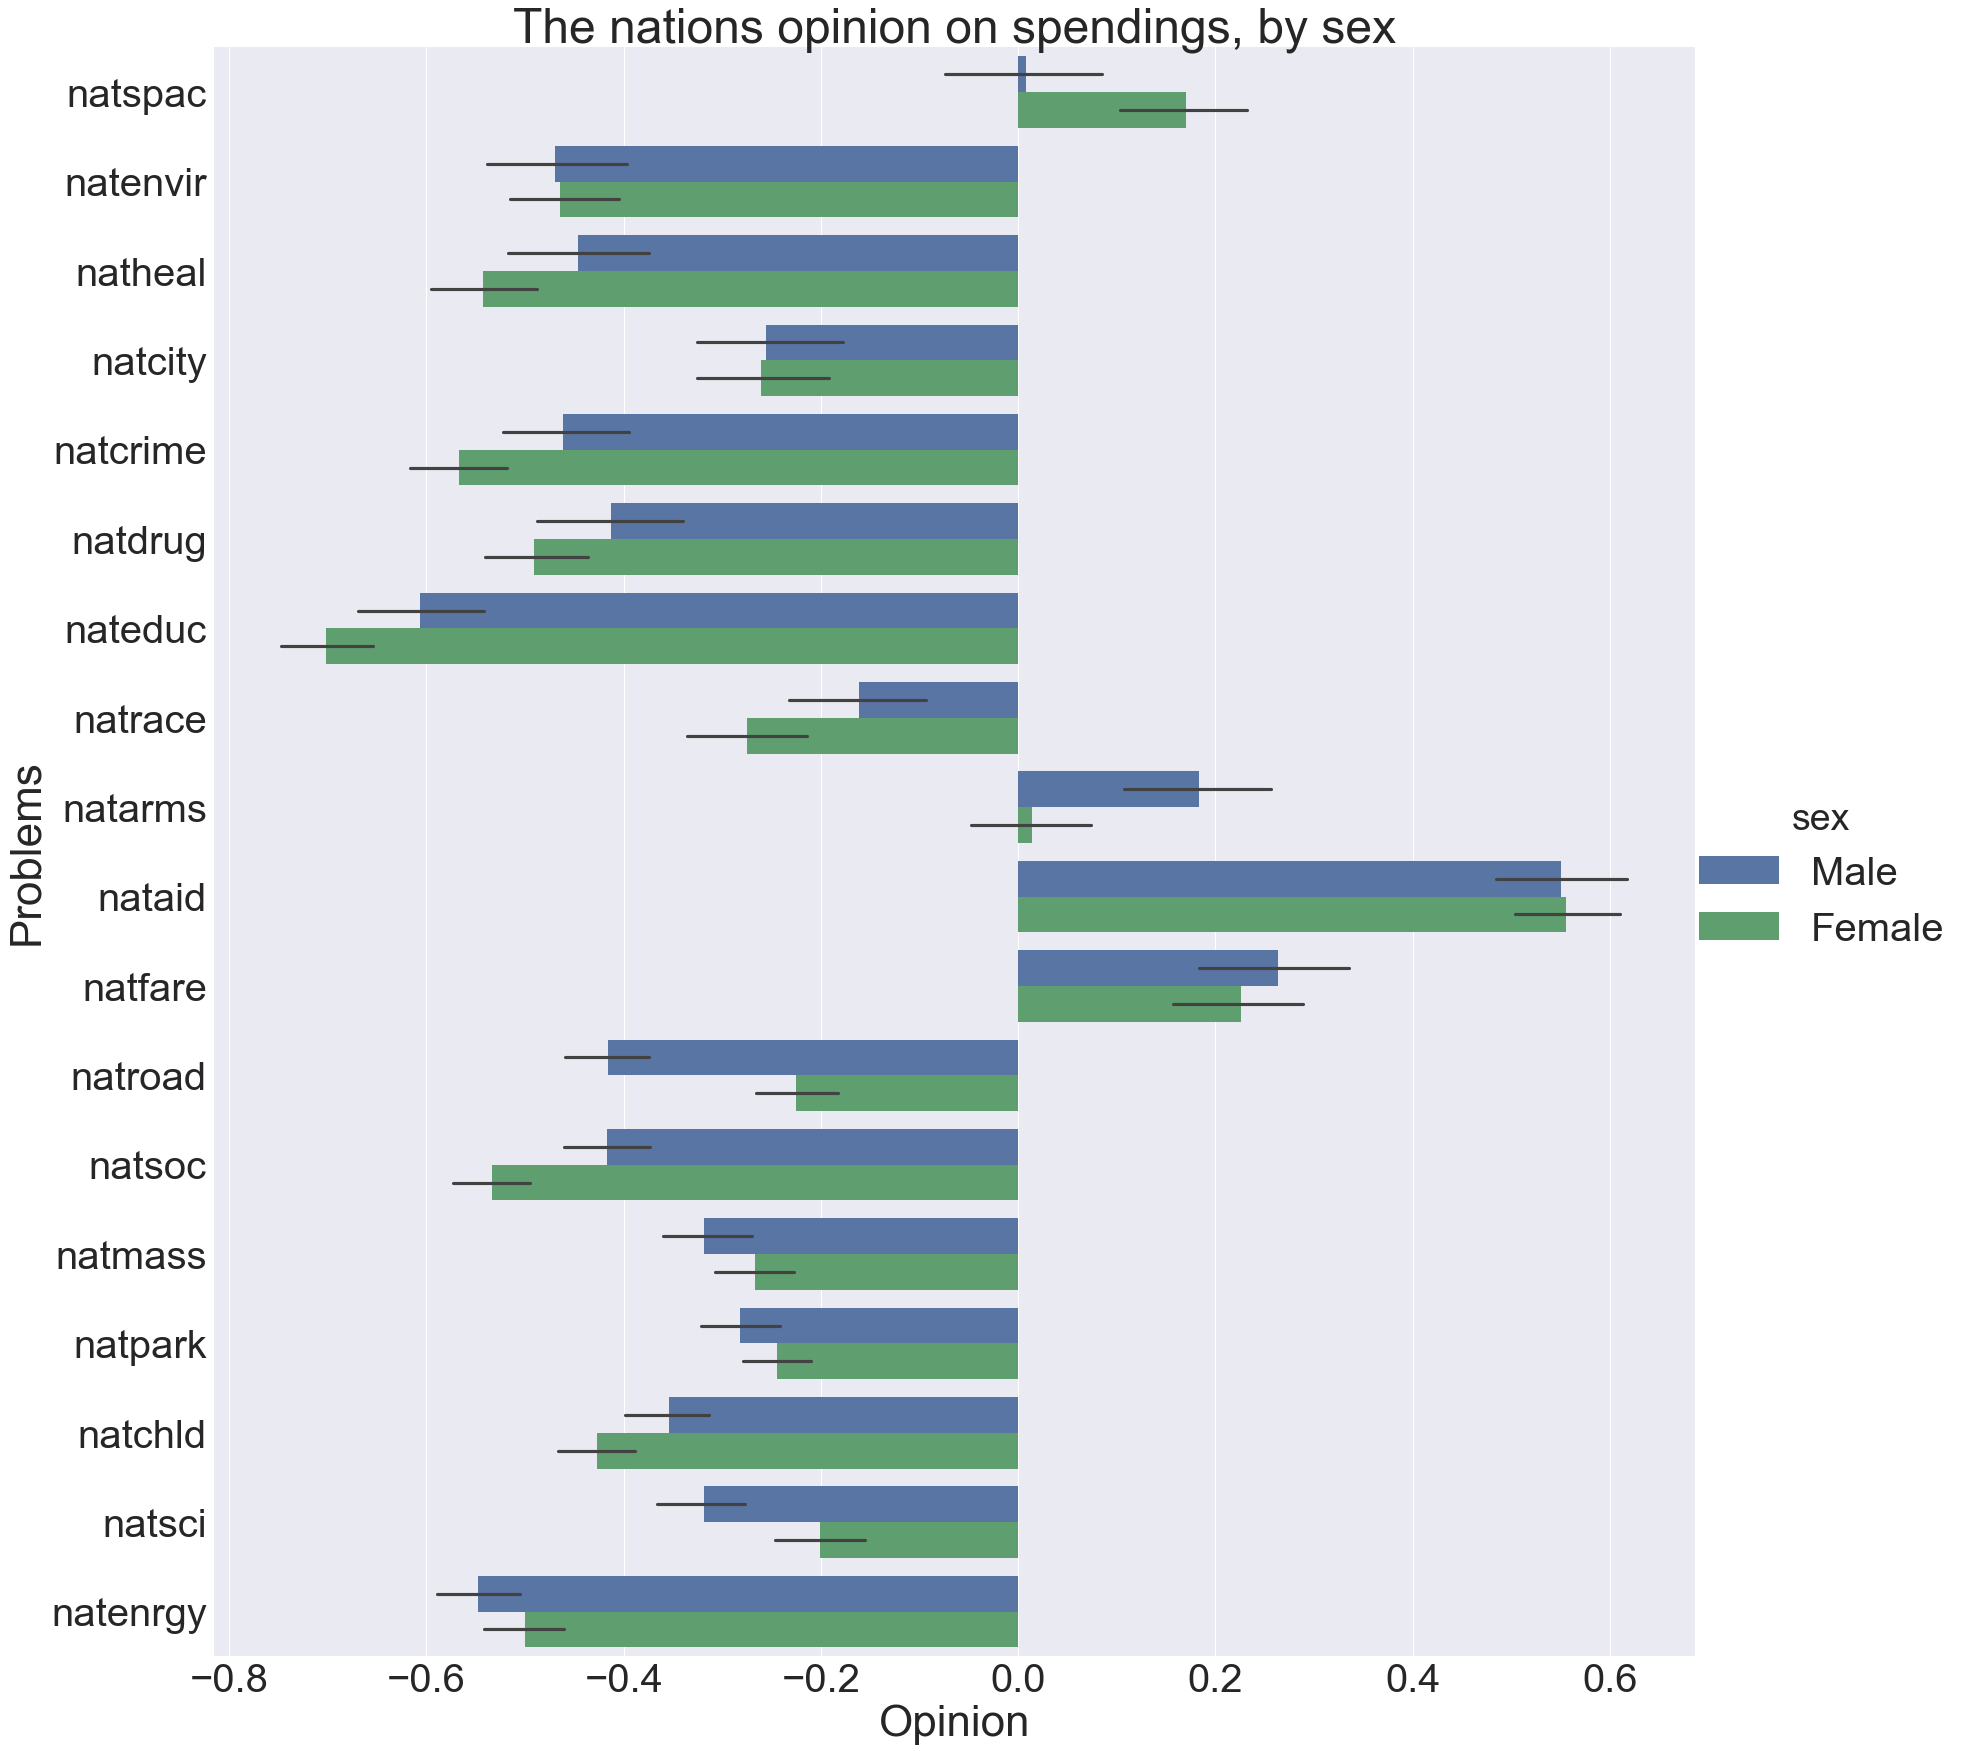

In [159]:
df_nat_num = df_nat.replace('About right', 0).replace('Too much', 1).replace('Too little', -1)
df_nat_melt = pd.melt(df_nat_num, id_vars = 'sex', var_name = 'Problems', value_name = 'Opinion')
sns.set(font_scale = 4)
sns.factorplot(x = 'Opinion', y = 'Problems', hue = 'sex', data = df_nat_melt, kind = 'bar', orient = 'h',
             size = 25)
plt.title('The nations opinion on spendings, by sex')
plt.show()

From the plot above, we can make a few observations:
1. The average opinion of men and women tend to be in the same direction. In other words, they agree on all the issues on average: either both think that the spending is too much or both think that the spending is too little. 
2. For most social problems, people think that the nation needs to spend more on tackling them, except for three problems related with foreign countries: natarms, nataid, natfare. We can tentatively conclude that people want the nation's spending to be more focused on tackling domestic issues and improving citizens' lives.
3. Women tend to have less variation in their opinions than men do.
4. Our earlier observation of women having stronger opinions is only partially true. While their average opinion does have a larger magnitude for most people-related issues such as crime, drug, education, and childcare, men feel more strongly about certain issues such as transportation('natmass', 'natroad'). 
5. Men and women have very different opinions regarding space exploration programs and military, armaments, and defense('natspac', 'natarms'). However, the magnitude of the average response for both variables is small, probably indicating that these issues are more controversial and people tend to have less consistent opinions in general. 

### 2. How many children do people have?

I'd also like to explore the correlation between number of children and other attributes of the respondents with this dataset. More specifically, I want to see whether the size of the family of the respondent, family income of the respondent, and education attainment of the respondent is associated with the number of children they have. Since it's difficult to identify causal relationship with preliminary EDA alone, I'm mainly looking at correlations.

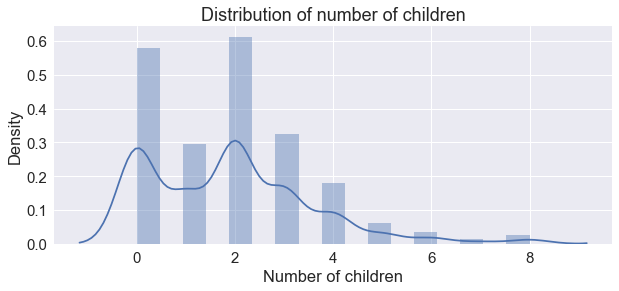

In [162]:
plt.figure(figsize = (10, 4))
sns.set(font_scale = 1.5)
sns.distplot(df['childs'].replace(np.NaN, 0))
plt.title('Distribution of number of children')
plt.xlabel('Number of children')
plt.ylabel('Density')
plt.show()

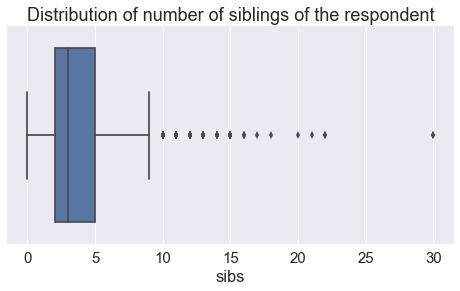

In [163]:
sns.set(font_scale = 1.5)
plt.figure(figsize = (8, 4))
sns.boxplot(x = df['sibs'])
plt.title('Distribution of number of siblings of the respondent')
plt.show()

The distribution of children centers around 2, excluding a large number of people who don't have any children.

The distribution of number of siblings is interesting, since we can see that not only do the respondents on average have more siblings than the number of children they have, which is probably a society-wide phenomenon of people having less children than the previous generations, there are also many outliers to the number of siblings. Some people even reported having 30 siblings. If we take a closer look at the outliers:

In [148]:
df[df['sibs'] > 25]

,year,id,wrkstat,wrkslf,wrkgvt,marital,sibs,childs,age,educ,...,south,divlaw2,age.f,mslm_spk.high,mslm_spk.yes,grass.legal,age2,relig2,dem,science_quiz.f
881,2012,882.0,WORKING FULL TIME,SOMEONE ELSE,PRIVATE,Divorced,30.0,7.0,33.0,10th grade,...,South,More difficult,33.0,0.0,0.0,NaN,>=31,NaN,1.0,NaN
1916,2012,1917.0,"UNEMPLOYED, LAID OFF",SOMEONE ELSE,GOVERNMENT,Never married,30.0,0.0,21.0,11th grade,...,South,Same/easier,21.0,0.0,0.0,NaN,<=30,NaN,0.0,NaN


Though there doesn't seem to be any immediately obviously explanation to why they have so many siblings, I can think of a few possible reasons. For example, their parents may have been married more than once and they counted siblings from all parents in the number; it may also just be a coincidence that their parents were extremely fertile; it might also be an error in reporting. 

I then plotted number of children against number of siblings, and while there seems to be a positive correlation, the correlation appears to be weak. Further statistical tests and possibly together with other variables are needed in order to determine whether the correlation is significant.

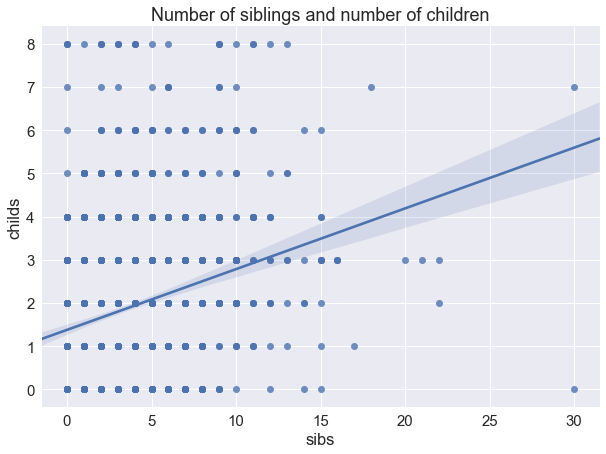

In [165]:
plt.figure(figsize = figure_size)
sns.regplot(x = df['sibs'], y = df['childs'])
plt.title('Number of siblings and number of children')
plt.show()

I then looked at income level and number of children.

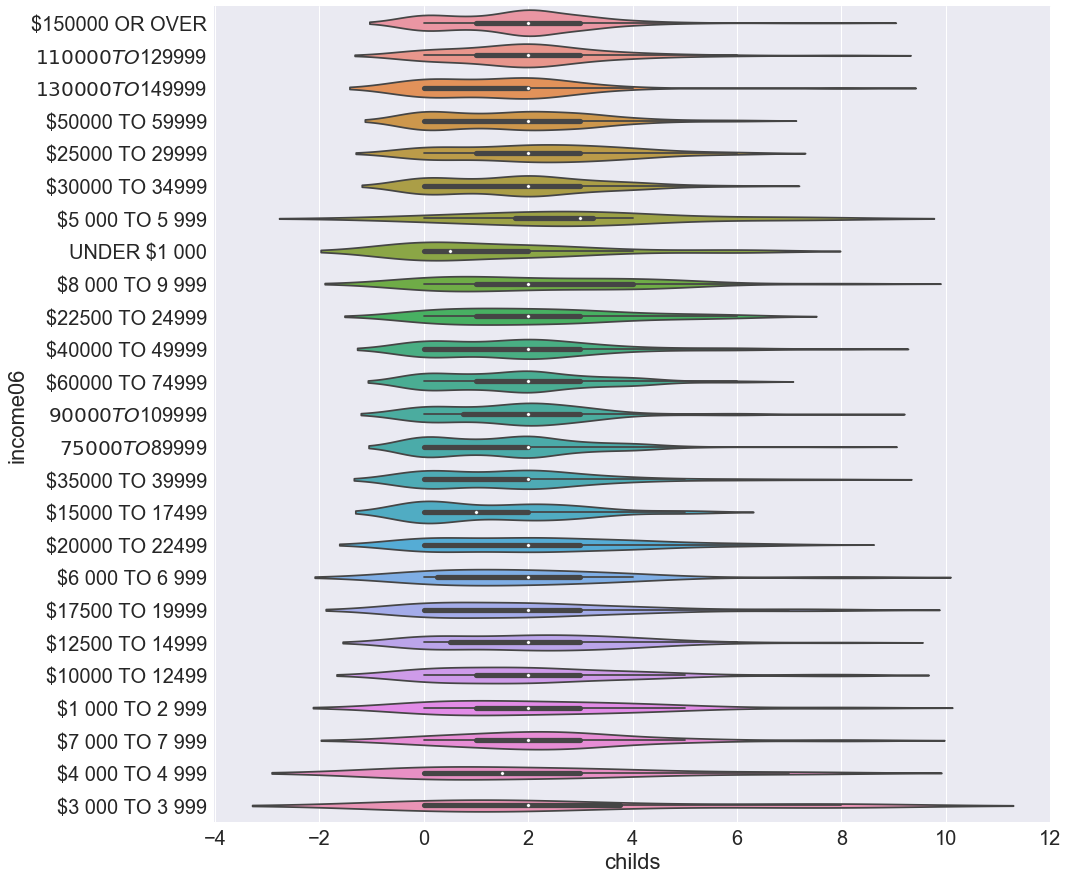

In [150]:
plt.figure(figsize = (15, 15))
sns.violinplot(y = df['income06'], x = df['childs'])
plt.show()

We can see that average number of children of most income brackets is around 2, and there isn't that much variation between different income brackets. As for missing values, there are three people who didn't provide an answer for number of children who are shown below. But since the number is small, I don't think there's significant implication on our analysis.

In [166]:
df[df['childs'].isnull()]

,year,id,wrkstat,wrkslf,wrkgvt,marital,sibs,childs,age,educ,...,south,divlaw2,age.f,mslm_spk.high,mslm_spk.yes,grass.legal,age2,relig2,dem,science_quiz.f
288,2012,289.0,WORKING FULL TIME,SOMEONE ELSE,PRIVATE,Married,NaN,NaN,45.0,2 years,...,South,NaN,45.0,0.0,0.0,0.0,>=31,Protestant,0.0,NaN
663,2012,664.0,WORKING FULL TIME,SOMEONE ELSE,PRIVATE,Divorced,4.0,NaN,52.0,1 yr coll,...,Nonsouth,NaN,52.0,0.0,0.0,0.0,>=31,Protestant,1.0,1.0
1213,2012,1214.0,RETIRED,SOMEONE ELSE,PRIVATE,Widowed,1.0,NaN,84.0,NaN,...,South,NaN,84.0,1.0,100.0,NaN,>=31,NaN,NaN,NaN


Finally, we'll look at the education and number of children. There are two variables that measure education, 'educ', which is the number of years pf schooling, and 'degree', which is highest degree obtained. I will plot a box or violin plot, ordered by education attainment for each variable.

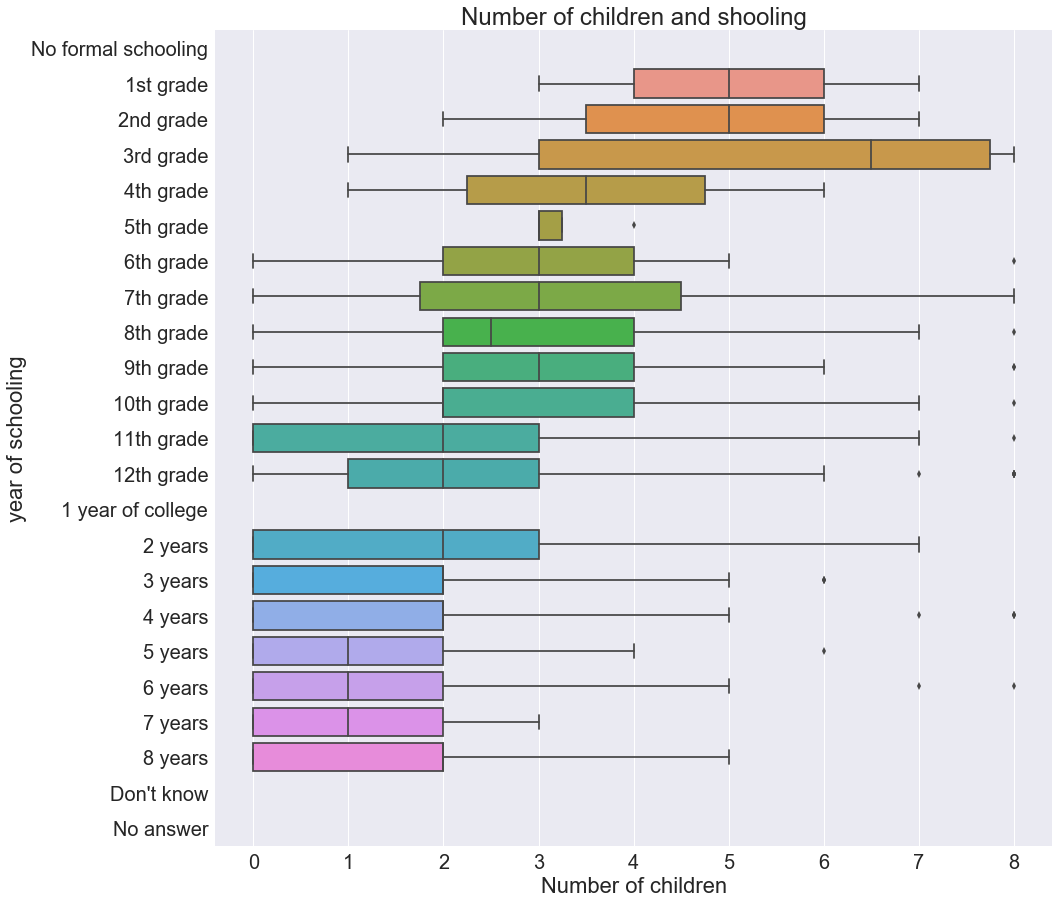

In [152]:
plt.figure(figsize = (15, 15))
orders = ['No formal schooling', '1st grade', '2nd grade', '3rd grade', '4th grade', 
          '5th grade', '6th grade', '7th grade', '8th grade', '9th grade', '10th grade', '11th grade', '12th grade',
         '1 year of college', '2 years','3 years','4 years','5 years','6 years','7 years','8 years',
         'Don\'t know', 'No answer']
sns.boxplot(y = df['educ'], x = df['childs'], order = orders)
plt.title('Number of children and shooling')
plt.xlabel('Number of children')
plt.ylabel('year of schooling')
plt.show()

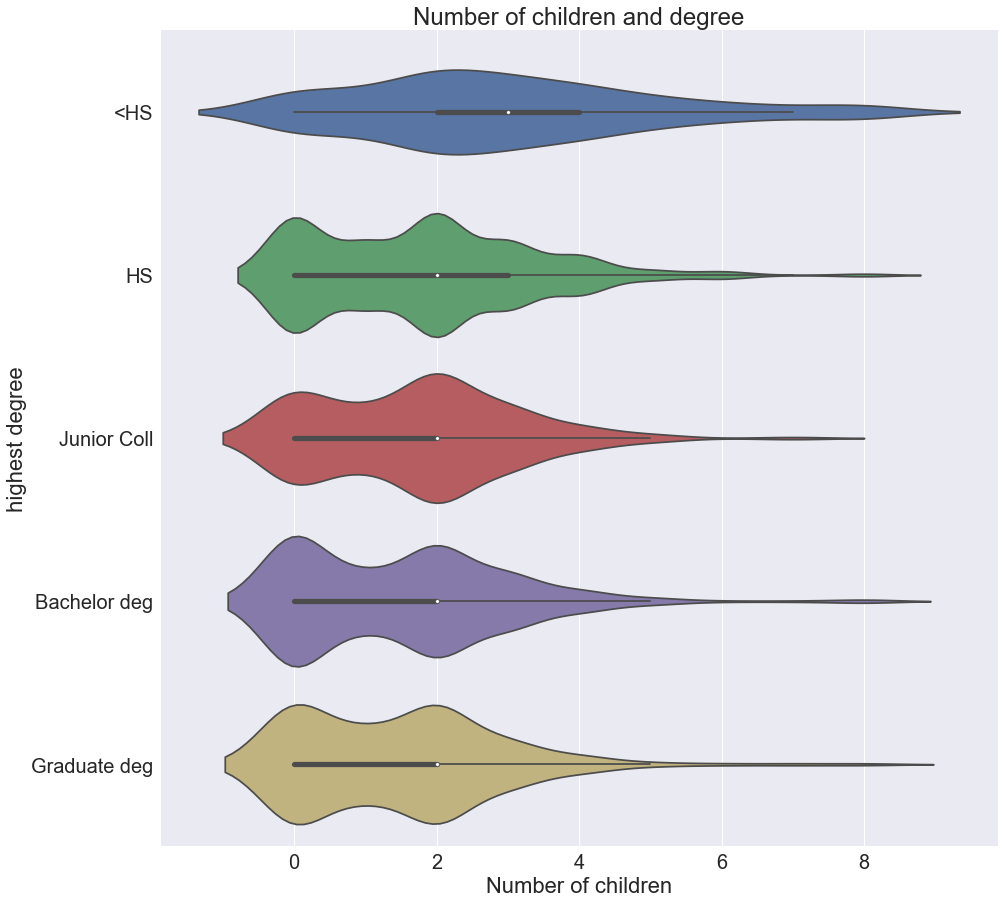

In [153]:
plt.figure(figsize = (15, 15))
orders = ['<HS', 'HS', 'Junior Coll', 'Bachelor deg', 'Graduate deg']
sns.violinplot(y = df['degree'], x = df['childs'], order = orders)
plt.title('Number of children and degree')
plt.xlabel('Number of children')
plt.ylabel('highest degree')
plt.show()

It's obvious from these two plots that education attainment has relatively good prediction power on the number of children, which is consistent with existing theories in economics. 

In conclusion, from this basic EDA process, I've found that while family income and the number of siblings of the respondent may not be strongly correlated with number of children, the education level of the respondent is a relatively good predictor. The more highly educated the respondent is, the less children he or she tends to have. 